# Yelp Data Analysis - Relationship between Density and Quality


In [2]:
import csv
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import operator #need this for sorting dicts later
import matplotlib.cm as cm #for colormapping later
from matplotlib.colors import LogNorm
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [3]:
## import the yelp business dataset as a csv
business_df = pd.read_csv('business.csv')

In [4]:
business_df.head()

,attributes.Ambience.divey,attributes.RestaurantsDelivery,attributes.DogsAllowed,postal_code,hours.Thursday,attributes.HairSpecializesIn.coloring,attributes.BestNights.sunday,attributes.BYOB,attributes.AgesAllowed,attributes.Music.video,...,attributes.Caters,attributes.RestaurantsReservations,attributes.DietaryRestrictions.dairy-free,attributes.DietaryRestrictions.vegan,attributes.Ambience.romantic,attributes.Music.jukebox,attributes.Ambience.upscale,attributes.RestaurantsTakeOut,attributes.BikeParking,attributes.OutdoorSeating
0,NaN,NaN,NaN,44143,10:00-21:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
1,False,True,NaN,28215,10:00-22:00,NaN,NaN,NaN,NaN,NaN,...,NaN,False,NaN,NaN,False,NaN,False,True,NaN,False
2,NaN,NaN,NaN,M4K 1N7,10:00-19:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
3,NaN,NaN,NaN,85258,9:00-17:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,False,NaN,85016,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,NaN,NaN,False,NaN,False,True,True,False


## Cleaning the Dataset

We are going to remove the unecessary columns from this dataset:

In [5]:
business_df = business_df[['name','postal_code','latitude','longitude','city','neighborhood','categories','stars','review_count']]

In [6]:
business_df.head()

,name,postal_code,latitude,longitude,city,neighborhood,categories,stars,review_count
0,Richmond Town Square,44143,41.541716,-81.493116,Richmond Heights,NaN,"[u'Shopping', u'Shopping Centers']",2.0,17
1,South Florida Style Chicken & Ribs,28215,35.236870,-80.741976,Charlotte,Eastland,"[u'Food', u'Soul Food', u'Convenience Stores',...",4.5,4
2,The Tea Emporium,M4K 1N7,43.677126,-79.353285,Toronto,Riverdale,"[u'Food', u'Coffee & Tea']",4.5,7
3,TRUmatch,85258,33.565082,-111.916400,Scottsdale,NaN,"[u'Professional Services', u'Matchmakers']",3.0,3
4,Blimpie,85016,33.505928,-112.038847,Phoenix,NaN,"[u'Sandwiches', u'Restaurants']",4.5,10


In [7]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156639 entries, 0 to 156638
Data columns (total 9 columns):
name            156639 non-null object
postal_code     156086 non-null object
latitude        156638 non-null float64
longitude       156638 non-null float64
city            156636 non-null object
neighborhood    62236 non-null object
categories      156639 non-null object
stars           156639 non-null float64
review_count    156639 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 10.8+ MB


We can focus on examining businesses only in Toronto

In [8]:
toronto_restaurants_df = business_df[business_df['city'] == 'Toronto']
toronto_restaurants_df.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
toronto_restaurants_df.head(10)

,name,postal_code,latitude,longitude,city,neighborhood,categories,stars,review_count
2,The Tea Emporium,M4K 1N7,43.677126,-79.353285,Toronto,Riverdale,"[u'Food', u'Coffee & Tea']",4.5,7
26,Hart House Theatre,M5S 3H3,43.663669,-79.394687,Toronto,University of Toronto,"[u'Arts & Entertainment', u'Performing Arts']",4.0,8
38,McCarthy's Irish Pub,M4L 2B5,43.678049,-79.314774,Toronto,Upper Beach,"[u'Pubs', u'Restaurants', u'Bars', u'Irish', u...",4.0,5
44,Paris Bakery & Pastry,M6H 3Z5,43.662401,-79.444706,Toronto,Wallace Emerson,"[u'Bakeries', u'Food']",3.0,16
53,Oishi Sushi,M3J 2G5,43.763510,-79.490750,Toronto,NaN,"[u'Asian Fusion', u'Restaurants', u'Sushi Bars']",2.0,27
55,Boardwalk Place,M4W 3L6,43.663010,-79.310898,Toronto,NaN,"[u'American (Traditional)', u'Restaurants', u'...",3.0,13
62,Adelaide Hall,M5H 1X6,43.648172,-79.389077,Toronto,Entertainment District,"[u'Nightlife', u'Music Venues', u'DJs', u'Arts...",3.5,10
63,Sangria Lounge,M6R 2K9,43.643537,-79.447954,Toronto,High Park,"[u'Nightlife', u'Lounges', u'Beer', u'Wine & S...",3.5,23
134,Buonanotte,M5V 1H2,43.645687,-79.390493,Toronto,Entertainment District,"[u'Italian', u'Restaurants']",2.0,66
154,Big Daddy's Bourbon Street Bistro & Oyster Bar,M5H 1K5,43.647499,-79.386471,Toronto,Entertainment District,"[u'Cajun/Creole', u'Restaurants', u'Seafood']",3.5,132


Next, we create a DataFrame called not_restaurant. We filter through all the values in the categories column for non restaurant businesses and store these corresponding rows in it. At this time, we are only considering u'Restaurant as our restaurant variable. However, this can be extended to include Pubs with u'Pubs or coffee shops with u'Coffee & Tea

In [9]:
not_restaurant = pd.DataFrame()
for lst in toronto_restaurants_df['categories']:
    if "u'Restaurants'" not in lst:
        not_restaurant = not_restaurant.append(toronto_restaurants_df[toronto_restaurants_df['categories'] == lst])

This is what the dataframe with non retsaurant businesses looks like now:

In [10]:
not_restaurant.describe()

,latitude,longitude,stars,review_count
count,186666.000000,186666.000000,186671.000000,186671.000000
mean,43.672475,-79.393946,3.544356,15.765973
std,0.127474,0.083513,0.846756,24.987281
min,-9.095137,-79.653939,1.000000,3.000000
25%,43.650502,-79.415217,3.000000,4.000000
50%,43.662401,-79.392898,3.500000,7.000000
75%,43.678225,-79.377921,4.000000,15.000000
max,45.028731,-51.833829,5.000000,620.000000


For the sake of proper methodology, we also store all the restaurant businesses in a separate dataframe called is_restaurant and pick a single restaurant at random and store it in the variable restaurant_df:

In [11]:
is_restaurant = pd.DataFrame()
for lst in toronto_restaurants_df['categories']:
    if "u'Restaurants'" in lst:
        is_restaurant = is_restaurant.append(toronto_restaurants_df[toronto_restaurants_df['categories'] == lst])

In [12]:
is_restaurant.describe()

,latitude,longitude,stars,review_count
count,122208.000000,122208.000000,122208.000000,122208.000000
mean,43.686856,-79.387640,3.300181,34.697589
std,0.050628,0.061476,0.722381,63.290478
min,43.592411,-79.703390,1.000000,3.000000
25%,43.653504,-79.414505,3.000000,6.000000
50%,43.665449,-79.393182,3.500000,15.000000
75%,43.705170,-79.369205,4.000000,38.000000
max,43.876501,-79.137540,5.000000,1258.000000


In [13]:
restaurant_df = is_restaurant.iloc[[0]]
restaurant_df

,name,postal_code,latitude,longitude,city,neighborhood,categories,stars,review_count
38,McCarthy's Irish Pub,M4L 2B5,43.678049,-79.314774,Toronto,Upper Beach,"[u'Pubs', u'Restaurants', u'Bars', u'Irish', u...",4.0,5


Next, we will calculate the distances between all the non-restaurant businesses in not_restaurant and McCarthy's Irish Pub. The Haversine formula is needed to calculate the great-circle distance. The great-circle distance is simply the shortest distance over the Earth's surface. The advantage of using the Haversine formula is that it maintains its integrity in calculations, even over small distances unlike the Law of Cosine formula.

In [14]:
## Function that calculates the haversine


df = pd.DataFrame()

df['LAT_rad'], df['LON_rad'] = np.radians(not_restaurant['latitude']), np.radians(not_restaurant['longitude'])
df['dLON'] = df['LON_rad'] - math.radians(restaurant_df['longitude'])
df['dLAT'] = df['LAT_rad'] - math.radians(restaurant_df['latitude'])

# using heaversine's formula:
not_restaurant['distance'] = 6367 * 2 * np.arcsin(np.sqrt(np.sin(df['dLAT']/2)**2 + math.cos(math.radians(37.2175900)) * np.cos(df['LAT_rad']) * np.sin(df['dLON']/2)**2))
not_restaurant = not_restaurant.drop_duplicates(subset=['name','postal_code','review_count', 'distance'], keep=False)

In [15]:
not_restaurant.describe()

,latitude,longitude,stars,review_count,distance
count,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000
mean,43.659746,-79.390947,3.702381,12.928571,10.215756
std,0.863939,0.454143,0.979130,24.914754,107.032880
min,-9.095137,-79.653939,1.000000,3.000000,0.043838
25%,43.649911,-79.419545,3.000000,4.000000,6.136997
50%,43.662539,-79.395460,4.000000,6.000000,7.692270
75%,43.680457,-79.378843,4.500000,13.000000,10.258139
max,43.844762,-51.833829,5.000000,530.000000,6547.408868


In [16]:
# Taking a copy of the non restaurant businesses 
not_restaurant.drop_duplicates(subset=['name'], keep=False)
measure_1 = not_restaurant


## Restaurant 1: 4.0 Rating

In [17]:
measure_1 = measure_1.loc[not_restaurant['distance'] <=1.0]
measure_1.describe()
mean1 = measure_1['stars'].mean()

KeyError: 63

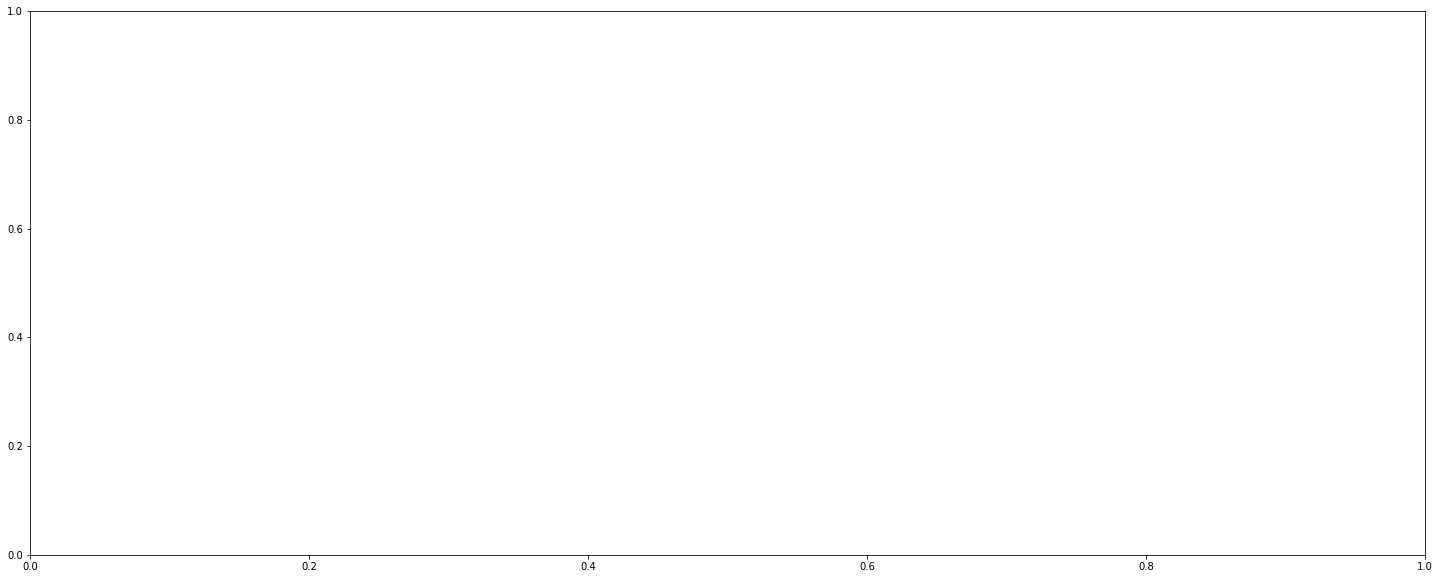

In [18]:
# Setting the positions and width for the bars
pos = list(range(len(measure_1['distance']))) 
width = 0.25 

# Plotting the bars
fig, ax = plt.subplots(figsize=(25,10))

# Create a bar with distances data,
# in position pos,
plt.bar(pos, measure_1['distance'], width, alpha=0.5, color='#EE3224', label= measure_1['name'][63]) 

# Set the y axis label
ax.set_ylabel('Non-Restaurant Businesses')

# Set the x axis label
ax.set_xlabel('Distance from Restaurant')

# Set the chart's title
ax.set_title('Distances of Non-Restaurant Businesses from Restaurant')

plt.grid()
plt.show()

The Coupled Bar Plot above shows the distances of all the non-restaurant businesses that are within 0.2 km of the chosen restaurant. We can see that most businesses are around 0.2km away from the restaurant. There are in total 16 non-business restaurants near the McCarthy Irish Pub - a 4.0 rating business. We can get the density of the area to be:

                                 density ~ 16/0.79
                                         ~ 20.253164557 businesses/sq km
                                         
               


In [ ]:
sns.factorplot(x='stars', kind ='count',data = measure_1, palette = 'winter_d',
               size = 8.5)
sns.set_style('darkgrid')

31% of the businesses have low ratings. 37.8% have average rating and 31.2% have excellent ratings.

## Restaurant 2:  Gabby's Roncesvalles - 2.5 Rating


In [ ]:
## Getting the next Pub in Toronto:

x = pd.DataFrame()
for lst in is_restaurant['categories']:
    if "u'Pubs'" in lst:
        x = x.append(is_restaurant[is_restaurant['categories'] == lst])

x = x.loc[x['stars'] < 3.0].head()
restaurant_df = x.iloc[[0]]
restaurant_df

In [ ]:
## Applying the Haversine formula (inspired by StackOverflow Suggestions):


df = pd.DataFrame()

df['LAT_rad'], df['LON_rad'] = np.radians(not_restaurant['latitude']), np.radians(not_restaurant['longitude'])
df['dLON'] = df['LON_rad'] - math.radians(restaurant_df['longitude'])
df['dLAT'] = df['LAT_rad'] - math.radians(restaurant_df['latitude'])

# using heaversine's formula:
not_restaurant['distance'] = 6367 * 2 * np.arcsin(np.sqrt(np.sin(df['dLAT']/2)**2 + math.cos(math.radians(37.2175900)) * np.cos(df['LAT_rad']) * np.sin(df['dLON']/2)**2))
not_restaurant = not_restaurant.drop_duplicates(subset=['name','postal_code','review_count', 'distance'], keep=False)

In [ ]:
## Getting all the non-restaurant businesses with the distances calculated
not_restaurant.head()

In [ ]:
## Removing duplicates if any 
not_restaurant.drop_duplicates(subset=['name', 'postal_code', 'latitude'], keep=False)
df_2 = not_restaurant
df_2 = df_2.loc[df_2['distance'] <= 0.5]

df_2.describe()


In [ ]:
measure_2 = df_2
# Setting the positions and width for the bars
pos = list(range(len(measure_2['distance']))) 
width = 0.25 

# Plotting the bars
fig, ax = plt.subplots(figsize=(25,10))

# Create a bar with distances data,
# in position pos,
plt.bar(pos, measure_2['distance'], width, alpha=0.5, color='#EE3224', label= measure_2['name'][63]) 

# Set the y axis label
ax.set_ylabel('Non-Restaurant Businesses')

# Set the x axis label
ax.set_xlabel('Distance from Restaurant')

# Set the chart's title
ax.set_title('Distances of Non-Restaurant Businesses from Restaurant')

plt.grid()
plt.show()

The Coupled Bar Plot above shows the distances of all the non-restaurant businesses that are within 0.5 km of the chosen restaurant. We can see that most businesses are around 0.2km away from the restaurant. There are in total 19 non-business restaurants near the Gabby's Roncesvalles Pub - a 2.5 rating business. We can get the density of the area to be:

                             density ~ 19/3.14159
                                     ~ 24.050632911 businesses/sq km

The 2.5 star restaurant has the exact same density as the 4.0 one
                                     

In [ ]:
sns.factorplot(x='stars', kind ='count',data = measure_2, palette = 'winter_d',
               size = 8.5)
sns.set_style('darkgrid')

We see that despite haveing a low rating of 2.0, the surrounding businesses have an average high rating of 4.5. Only 10% of the businesses have a 3.0 and lower rating. 57.8% have an average rating and 37% have excellent ratings. Note though that this is a an equally high density area.


## Restaurant 3:  Wychwood Pub 2.0 Rating 

In [ ]:
## Getting the next Pub in Toronto:

x = pd.DataFrame()
for lst in is_restaurant['categories']:
    if "u'Pubs'" in lst:
        x = x.append(is_restaurant[is_restaurant['categories'] == lst])

x.describe()
#x = x.loc[x['stars'] < 3.0].head()
#restaurant_df = x.iloc[[1]]
#restaurant_df

In [ ]:
## Applying the Haversine formula:


df = pd.DataFrame()

df['LAT_rad'], df['LON_rad'] = np.radians(not_restaurant['latitude']), np.radians(not_restaurant['longitude'])
df['dLON'] = df['LON_rad'] - math.radians(restaurant_df['longitude'])
df['dLAT'] = df['LAT_rad'] - math.radians(restaurant_df['latitude'])

# using heaversine's formula:
not_restaurant['distance'] = 6367 * 2 * np.arcsin(np.sqrt(np.sin(df['dLAT']/2)**2 + math.cos(math.radians(37.2175900)) * np.cos(df['LAT_rad']) * np.sin(df['dLON']/2)**2))
not_restaurant = not_restaurant.drop_duplicates(subset=['name','postal_code','review_count', 'distance'], keep=False)

In [ ]:
## Removing duplicates if any 
not_restaurant.drop_duplicates(subset=['name', 'postal_code', 'latitude'], keep=False)
df_3 = not_restaurant
df_3 = df_3.loc[df_3['distance'] <= 0.5]

df_3.describe()


In [ ]:
measure_3 = df_3
# Setting the positions and width for the bars
pos = list(range(len(measure_3['distance']))) 
width = 0.25 

# Plotting the bars
fig, ax = plt.subplots(figsize=(25,10))

# Create a bar with distances data,
# in position pos,
plt.bar(pos, measure_3['distance'], width, alpha=0.5, color='#EE3224', label= measure_3['name'][ 29841]) 

# Set the y axis label
ax.set_ylabel('Non-Restaurant Businesses')

# Set the x axis label
ax.set_xlabel('Distance from Restaurant')

# Set the chart's title
ax.set_title('Distances of Non-Restaurant Businesses from Restaurant')

plt.grid()
plt.show()

The Coupled Bar Plot above shows the distances of all the non-restaurant businesses that are within 0.2 km of the chosen restaurant. We can see that most businesses are around 0.2km away from the restaurant. There are in total 16 non-business restaurants near the Gabby's Roncesvalles Pub - a 2.5 rating business. We can get the density of the area to be:

                             density ~ 19/3.14159
                                     ~ 20.253164557 businesses/sq km

The 2.0 star restaurant has a slightly lower density as the 4.0 one
                                     

In [ ]:
sns.factorplot(x='stars', kind ='count',data = measure_3, palette = 'winter_d',
               size = 8.5)
sns.set_style('darkgrid')

In this lower density area, out of 16 businesses, 31% of the businesses have a 3.0 and lower rating. 37% of the businesses have an average rating while 31% have a high rating. While there is presence of high rating businesses, the proportion of it has reduced and the ratio of low quality businesses have increased. 

## Summary - Pubs:


Pubs across 3 areas in Toronto are compared. It is seen that 75% of the pubs have an overall higher rating of 4.0. 

1. When the pub has a high rating of 4.0 and density is 20 businesses/ sqkm: The % of lower rated businesses are higher(~31%)
2. When the pub has poor rating (2.0) and density is 20 businesses per sqkm: The % of lower rated businesses are higher (~31%)
3. When the pub has a poor rating of 2.5 and the density is higher with 25 businesses/sqkm: The % of lower rated businesses is only 10%. 

In [ ]:
not_restaurant.to_csv('not_restaurant.csv')

In [ ]:
is_restaurant.describe()

In [ ]:
pubs_df = pd.DataFrame()
for lst in is_restaurant['categories']:
    if "u'Pubs'" in lst:
        pubs_df = pubs_df.append(is_restaurant[is_restaurant['categories'] == lst])

#x.describe()
#x = x.loc[x['stars'] < 3.0].head()
#restaurant_df = x.iloc[[1]]
#restaurant_df

In [ ]:
pubs_df.to_csv('pubs.csv')